<center>
<img src="https://cdn-icons-png.freepik.com/256/6566/6566731.png?ga=GA1.1.790567652.1708766911&" alt="Voting" width="200" height="200">

**Sindh Provisional Assembly Elections *Form-47* 2024 Analysis**
</center>



In [66]:
import pandas as pd
import matplotlib.pyplot as plt

**Loading the Dataset**

In [67]:
df = pd.read_csv('Sindh Assambly.csv')
df.head()

,Sectored Number,Sector Name,Total Voters,Total Male Voters,Total Female Voters,Male Vote Casted,Female Vote Casted,Total Vote Casted,Accepted Votes,Discarded Votes,Winning Party
0,PS-1,Jacobabad-1,"214,229","114,290","99,939","46,957","32,667","79,624","76,016","3,608",PPP
1,PS-2,Jacobabad-2,"181,116","96,467","84,649","58,884","51,002","109,886","105,634","4,252",PPP
2,PS-3,Jacobabad-3,"196,661","105,805","90,856","46,927","35,702","82,629","75,172","7,457",IND
3,PS-4,Kashmor-1,"193,419","104,505","88,914","53,734","42,499","96,233","90,199","6,034",PPP
4,PS-5,Kashmor-2,"205,668","110,871","94,797","45,594","26,694","72,288","66,197","6,091",PPP


**Checking the data types**

In [68]:
print(df.select_dtypes(include='object').apply(lambda x: x.str.isdigit().all()))

Sectored Number        False
Sector Name            False
Total Voters           False
Total Male Voters      False
Total Female Voters    False
Male Vote Casted       False
Female Vote Casted     False
Total Vote Casted      False
Accepted Votes         False
Discarded Votes        False
Winning Party          False
dtype: bool


In [69]:
try:
  df_numeric = df.select_dtypes(include='object').apply(pd.to_numeric)
except:
  print("Error: Non-numeric values found.")

Error: Non-numeric values found.


**Remvoving the Special Characters**

In [70]:
df['Total Voters'] = df['Total Voters'].str.replace(r',', '')
df['Total Male Voters'] = df['Total Male Voters'].str.replace(r',', '')
df['Total Female Voters'] = df['Total Female Voters'].str.replace(r',', '')
df['Male Vote Casted'] = df['Male Vote Casted'].str.replace(r',', '')
df['Female Vote Casted'] = df['Female Vote Casted'].str.replace(r',', '')
df['Total Vote Casted'] = df['Total Vote Casted'].str.replace(r',', '')
df['Accepted Votes'] = df['Accepted Votes'].str.replace(r',', '')
df['Discarded Votes'] = df['Discarded Votes'].str.replace(r',', '')
df['Sector Name'] = df['Sector Name'].apply(lambda x: x.split('-')[0])

In [71]:
df.head()

,Sectored Number,Sector Name,Total Voters,Total Male Voters,Total Female Voters,Male Vote Casted,Female Vote Casted,Total Vote Casted,Accepted Votes,Discarded Votes,Winning Party
0,PS-1,Jacobabad,214229,114290,99939,46957,32667,79624,76016,3608,PPP
1,PS-2,Jacobabad,181116,96467,84649,58884,51002,109886,105634,4252,PPP
2,PS-3,Jacobabad,196661,105805,90856,46927,35702,82629,75172,7457,IND
3,PS-4,Kashmor,193419,104505,88914,53734,42499,96233,90199,6034,PPP
4,PS-5,Kashmor,205668,110871,94797,45594,26694,72288,66197,6091,PPP


**Biggest Sector in Sindh Assembly**

In [72]:
df['Sectored Number'].value_counts()

PS-1      1
PS-98     1
PS-96     1
PS-95     1
PS-94     1
         ..
PS-39     1
PS-38     1
PS-37     1
PS-36     1
PS-130    1
Name: Sectored Number, Length: 130, dtype: int64

In [73]:
df['Sector Name'].value_counts()

KarachiWasti          9
KarachiSharqi         9
KorangiKarachi        7
KarachiGarbi          6
Malir                 6
Hyderabad             6
KhairPur              6
Kemari                5
Badin                 5
KarachiSouth          5
Sanghar               5
MirPurKhas            4
Tharparkar            4
ShaheedBenazirAbad    4
NowshehraFeroz        4
Sukkur                4
Ghotki                4
Qamabr                4
Larkana               4
Daddu                 4
Jamshoro              3
Jacobabad             3
Kashmor               3
UmarKot               3
ShikarPur             3
Thatta                2
Sajawal               2
TandoMuhammadKhan     2
Mutiari               2
TandoAllhayar         2
Name: Sector Name, dtype: int64

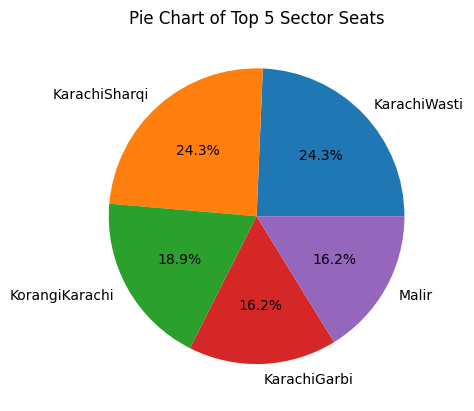

In [74]:
max_slices = 5
value_counts = df['Sector Name'].value_counts().sort_values(ascending=False)
top_categories = value_counts.index[:max_slices]
plt.pie(value_counts[top_categories].values, labels=top_categories.tolist(), autopct='%1.1f%%')
plt.title('Pie Chart of Top 5 Sector Seats')
plt.show()

In [75]:
df.columns

Index(['Sectored Number', 'Sector Name', 'Total Voters', 'Total Male Voters',
       'Total Female Voters', 'Male Vote Casted', 'Female Vote Casted',
       'Total Vote Casted', 'Accepted Votes', 'Discarded Votes',
       'Winning Party'],
      dtype='object')

In [81]:
df["Total Female Voters"] = pd.to_numeric(df["Total Female Voters"], errors="coerce")
Total_Female_Voters = df["Total Female Voters"].sum()
print(f"Total Female Voters:  {Total_Female_Voters}")

Total Female Voters:  12381804


In [85]:
df["Total Male Voters"] = pd.to_numeric(df["Total Male Voters"], errors="coerce")
Total_Male_Voters = df["Total Male Voters"].sum()
print(f"Total Male Voters:  {Total_Male_Voters}")

Total Male Voters:  14612166


In [89]:
from plotly.express import bar
fig = bar(df, x= df['Total Male Voters'], y= df['Total Female Voters'] , color="Total Male Voters")
fig.update_layout(title="Frequency Chart")
fig.show()

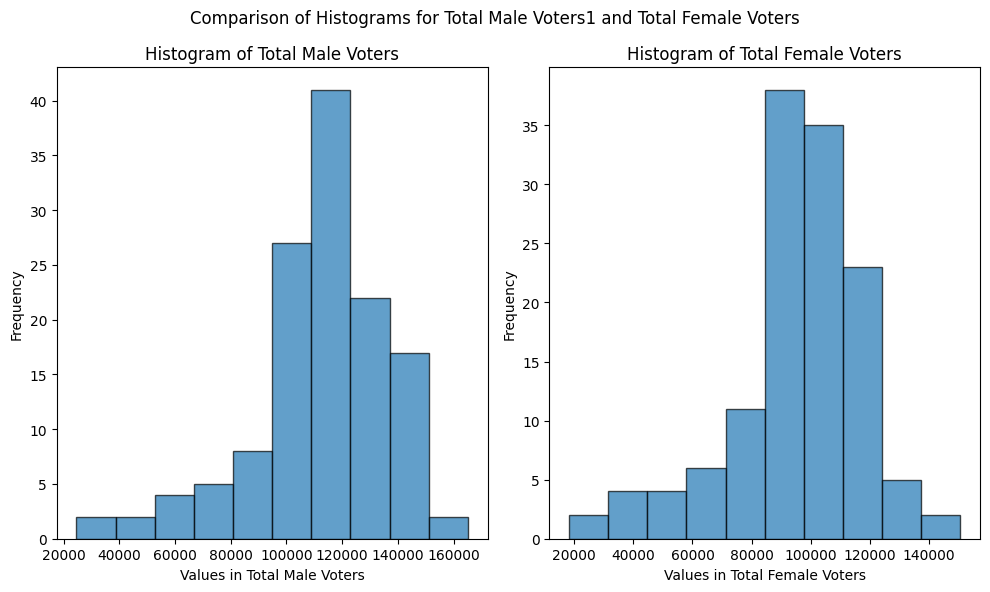

In [93]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df["Total Male Voters"], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel("Values in Total Male Voters")
plt.ylabel("Frequency")
plt.title("Histogram of Total Male Voters")
plt.subplot(1, 2, 2)
plt.hist(df["Total Female Voters"], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel("Values in Total Female Voters")
plt.ylabel("Frequency")
plt.title("Histogram of Total Female Voters")
plt.suptitle("Comparison of Histograms for Total Male Voters1 and Total Female Voters")
plt.tight_layout()
plt.show()

In [96]:
df["Male Vote Casted"] = pd.to_numeric(df["Male Vote Casted"], errors="coerce")
Male_Vote_Casted = df["Male Vote Casted"].sum()
print(f"Male Vote Casted:  {Male_Vote_Casted}")
df["Female Vote Casted"] = pd.to_numeric(df["Female Vote Casted"], errors="coerce")
Female_Vote_Casted = df["Female Vote Casted"].sum()
print(f"Female Vote Casted:  {Female_Vote_Casted}")

Male Vote Casted:  6837963
Female Vote Casted:  4892994


**Total Vote Casted**

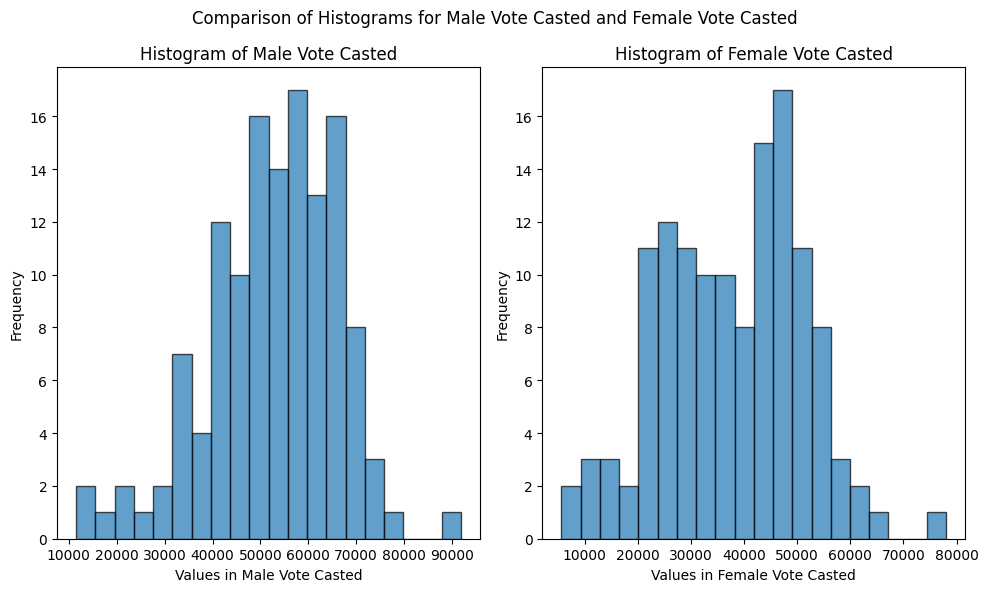

In [97]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df["Male Vote Casted"], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel("Values in Male Vote Casted")
plt.ylabel("Frequency")
plt.title("Histogram of Male Vote Casted")
plt.subplot(1, 2, 2)
plt.hist(df["Female Vote Casted"], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel("Values in Female Vote Casted")
plt.ylabel("Frequency")
plt.title("Histogram of Female Vote Casted")
plt.suptitle("Comparison of Histograms for Male Vote Casted and Female Vote Casted")
plt.tight_layout()
plt.show()

**Accepted or Discarded Votes**

In [98]:
df.columns

Index(['Sectored Number', 'Sector Name', 'Total Voters', 'Total Male Voters',
       'Total Female Voters', 'Male Vote Casted', 'Female Vote Casted',
       'Total Vote Casted', 'Accepted Votes', 'Discarded Votes',
       'Winning Party'],
      dtype='object')

In [99]:
df["Accepted Votes"] = pd.to_numeric(df["Accepted Votes"], errors="coerce")
Accepted_Votes = df["Accepted Votes"].sum()
print(f"Accepted Votes:  {Accepted_Votes}")
df["Discarded Votes"] = pd.to_numeric(df["Discarded Votes"], errors="coerce")
Discarded_Votes = df["Discarded Votes"].sum()
print(f"Discarded Votes:  {Discarded_Votes}")

Accepted Votes:  11328322
Discarded Votes:  401941


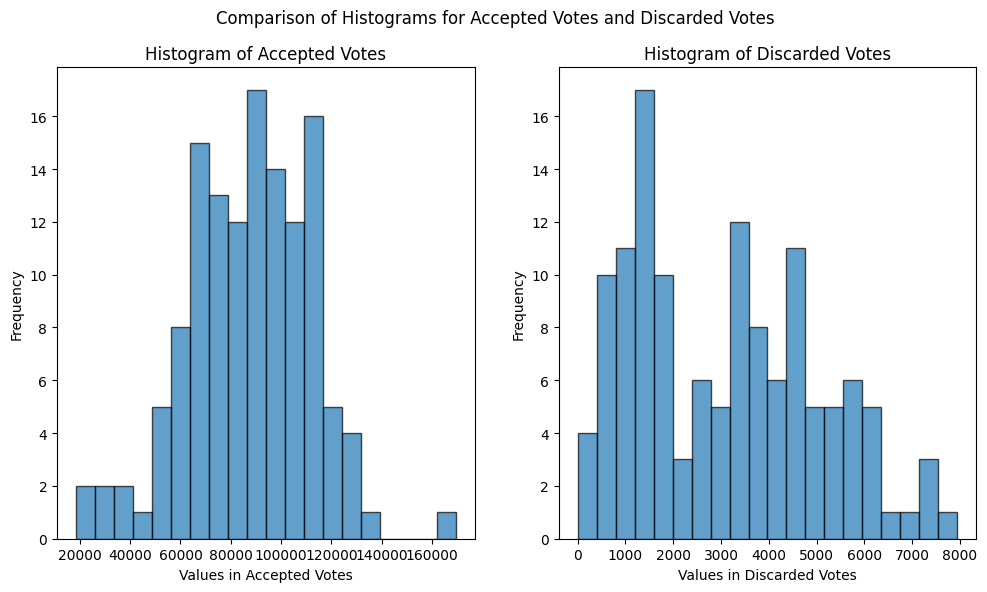

In [100]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df["Accepted Votes"], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel("Values in Accepted Votes")
plt.ylabel("Frequency")
plt.title("Histogram of Accepted Votes")
plt.subplot(1, 2, 2)
plt.hist(df["Discarded Votes"], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel("Values in Discarded Votes")
plt.ylabel("Frequency")
plt.title("Histogram of Discarded Votes")
plt.suptitle("Comparison of Histograms for Accepted Votes and Discarded Votes")
plt.tight_layout()
plt.show()

**Parties**

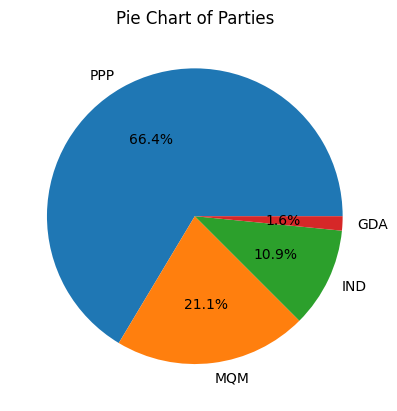

In [84]:
max_slices = 4
value_counts = df['Winning Party'].value_counts().sort_values(ascending=False)
top_categories = value_counts.index[:max_slices]
plt.pie(value_counts[top_categories].values, labels=top_categories.tolist(), autopct='%1.1f%%')
plt.title('Pie Chart of Parties')
plt.show()

## Author

<a href="https://www.linkedin.com/in/khuzaima-ayaz-07710a231/">Khuzaima Ayaz</a>